In [1]:
import pandas as pd
import numpy as np
import itertools
import math
import time
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

from g4l.data import Sample
import g4l.display

from g4l.estimators import CTM
from g4l.estimators import Prune
from g4l.estimators import SMC
import g4l.tree.generation as gen
import g4l.tree as tree

In [2]:
max_depth = 4
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])
t_incr = tree.ContextTree(X, max_depth=max_depth, tree_initialization_method=gen.incremental)
prune_trees = Prune(t_incr)
prune_trees.execute()

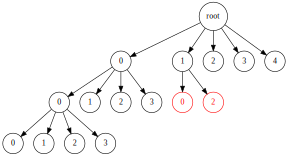

In [5]:
t = prune_trees.context_trees[3]
t2 = prune_trees.context_trees[2]
r = g4l.display.draw_tree(t, size='4, 4', previous_tree=t2)
r

In [4]:
print(t.to_str(), " / ", t2.to_str())

000 01 10 100 2 20 200 21 3 30 300 4  /  000 1 10 100 2 20 200 3 30 300 4


'10'